<a href="https://colab.research.google.com/github/haron1100/MLSummerSchool/blob/master/Session_5_Regression_and_Optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/gdrive/My Drive/data/BikeSharingDaily.csv')

In [16]:
def mse_cost(y, y_pred):
    diffs = y-y_pred
    squared_diffs = np.square(diffs)
    mean_squared_diff = np.mean(squared_diffs)
    return mean_squared_diff

In [17]:
print(df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'numpigeons'],
      dtype='object')


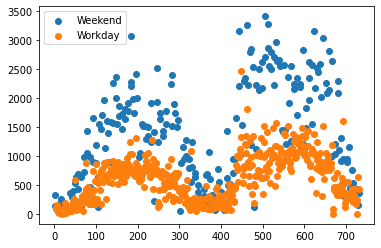

In [18]:
groups = df.groupby('workingday')
for name, group in groups:
    plt.scatter(group['instant'], group['casual'], label={0:'Weekend', 1:'Workday'}[name])
plt.legend()
plt.show()

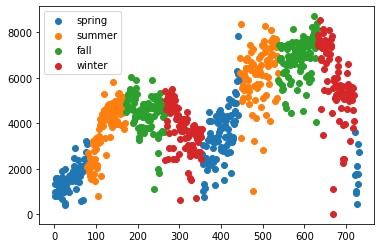

In [19]:
groups = df.groupby('season')
for name, group in groups:
    plt.scatter(group['instant'], group['cnt'], label={1:'spring', 2:'summer', 3:'fall', 4:'winter'}[name])
plt.legend()
plt.show()

In [59]:
#y = m*x + b
# y = m_1*x_1 + m_2*x_2 + m_3*x_3 ... + b
features = [df['temp'], df['hum'], df['windspeed'], df['atemp']]
x = np.stack(features, axis=1)
y = np.array(df['cnt'])

In [60]:
def random_search(n_iterations): #an optimiser
    lowest_cost = float("inf") #lowest cost ive seen thus far
    for i in range(n_iterations):#in a loop, until we do n_iterations
        m = np.random.uniform(0, 10000, len(features)) #randomly sample values for m
        b = np.random.uniform(0, 10000) #randomly sample values for b

        y_pred = np.zeros(len(y))
        for i in range(len(features)):
            y_pred += x[:, i] * m[i]
        y_pred += b
        
        cost = mse_cost(y, y_pred) #calculate the cost of that prediction
        if cost<lowest_cost: #if its the lowest cost we have achieved thus far
            best_m = m #store the values for this m in a a variable
            best_b = b #store the values for this b in a a variable
            lowest_cost = cost #set the lowest cost to this new lowest cost
    return best_m, best_b #return best m and b values       

found parameters m: [2330.26131241  900.39114344 3643.05475717 2248.10776265] b: 1568.403570380219
cost 3074147.229573636


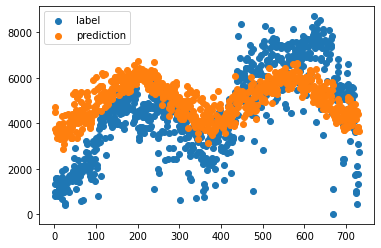

In [61]:
m, b = random_search(1000)

y_pred = np.zeros(len(y))
for i in range(len(features)):
    y_pred += x[:, i] * m[i]
y_pred += b

cost = mse_cost(y, y_pred)
print('found parameters m:',m , 'b:', b)
print('cost', cost)
plt.scatter(df['instant'], y, label="label")
plt.scatter(df['instant'], y_pred, label="prediction")
plt.legend()
plt.show()